# TP2: Convolution

In this TP you will implement a simple convolution in 1d and in 2d.


In [65]:
#!pip install scikit-image

In [66]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

# make figures appear inline
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Convolustion with 1d signals

We will create a time series, and we will apply a filter (or kernel) to it.
To create the time series, we will use the random walk algorithm. Later you will need to fill the missing part in the conv1d function.

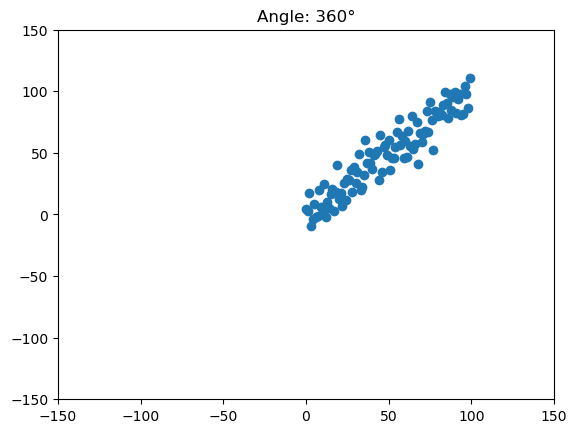

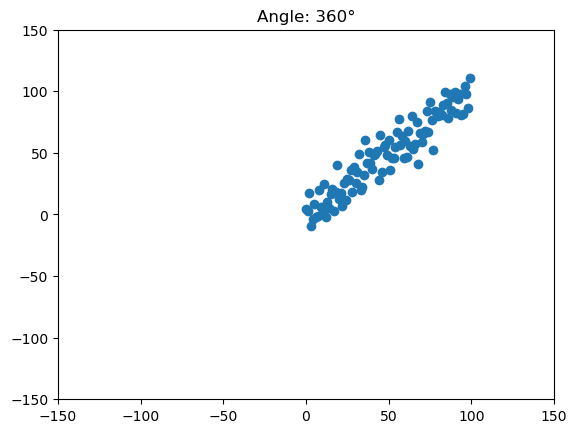

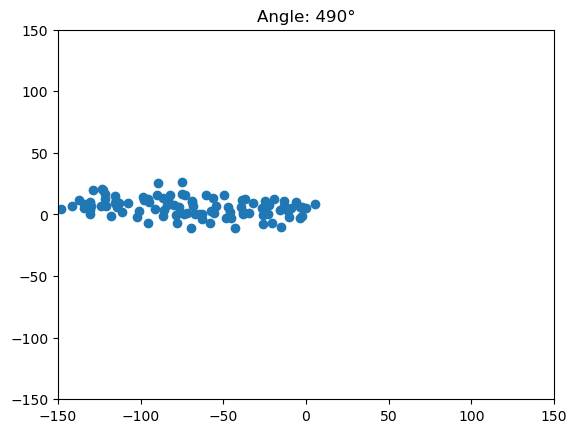

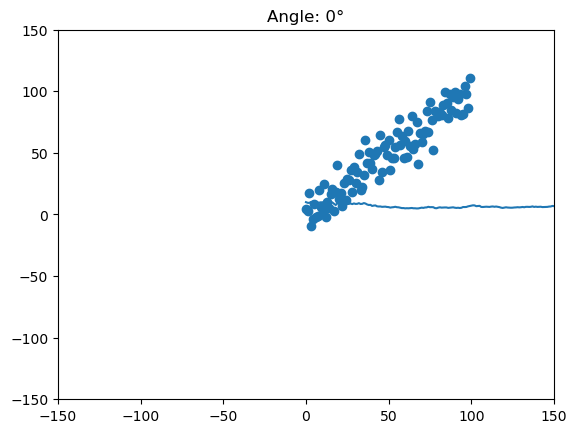

In [67]:
# Set a random seed so everyone has same results
np.random.seed(133)

# define a fct that will return a random time series
def create_time_serie(n, x_0=10., v=0.05):
    time_serie = [x_0]
    for _ in range(n-1):
        value = time_serie[-1] * (1 + np.random.normal(0, v))
        time_serie.append(value)
    return np.array(time_serie)

# get the time series
n = 1000
time_serie = create_time_serie(n)

# show the time series
plt.plot(time_serie)
# plt.scatter(range(n), time_serie)
plt.show()

Now that we have a time series, we can apply a convolution to it. To do so, fill the missing part in the function (conv1d) just bellow.

In [68]:
def conv1d(signal, kernel, padding=0, stride=1):
    result = []
    kernel_len = len(kernel)
    # padding = kernel_len//2 
    signal = [0] * padding + signal.tolist() + [0] * padding
    signal = np.array(signal)
    
    for i in range(0, len(signal) - kernel_len + 1, stride):
        # compute the convolution and add the it to the result list
        # For the 1d convolution you need to convolut part of the curve with the kernel
        # Hint:
        #   - np.inner may be useful here

        #############################################################
        # your code here
        """
        1. Identify the window of kernel_len values that is needed
        Dealing with potential out of bound problem is the big troublesome part. 
            Because this is more of a technical problem, I used Copilot to suggest something. 
            As is, this setup only start when the center of the kernel can be included, and stop when it can not.
            As such, this method require padding = kernel_len//2 to produce a result of equal length to the input. 
            It also isn't really a full convolution, in a sense ? 
            It's possible to start the conv with only one element of the kernel in the 
        2. Take the inner product of the window.T and the kernel
            For this, I had the intuition this is what needed to be done without using Chat, 
            thanks to the entire ex 1.3, and the video by 3Blue1Brown on the subject of convolution. 
        """
        start_index = max(0, i - kernel_len // 2)
        end_index = min(len(signal), i + kernel_len // 2 + 1)
        window = signal[start_index:end_index]
        conv = np.inner(window.T, kernel[:len(window)])

        #############################################################
        result.append(conv)

    return np.array(result)

Now test your code and visualize the result of the convolution.

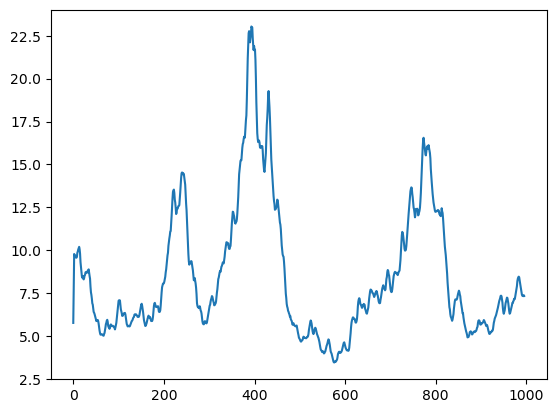

The length of the timeserie is 1000
The length of the result is 996


In [69]:
# get the time series
np.random.seed(133)
n = 1000
time_serie = create_time_serie(n)

# define the kernel
kernel = np.array([1/5, 1/5, 1/5, 1/5, 1/5])

# do the convolution
result = conv1d(time_serie, kernel,padding=0, stride=1)

# show the time series
plt.plot(result)
plt.show()
print(f"The length of the timeserie is {len(time_serie)}")
print(f"The length of the result is {len(result)}")

**Question**

1. The function conv1d, takes several arguments: x, kernel, padding, stride, please define each of this terms and how they are used in the convolution.
2. What can you say about the kernel we choose to apply to the time series? If the time series is the evolution of a stock price, then what is the convolution doing?
3. Look at the time series before and after the convolution, are the curves the same? If they aren't, explain the effect of the convolution.

*Answer this question in your report*

## Convolution with 2d signals

Convolution in 2d is equivalent to convolution with 1d signals. With 2d signals, we need to do the convolution over both dimensions and not only one. To achieve this, the kernel should also be 2d.
We will follow the same convention as before, but this time we will consider an image instead of a time series.

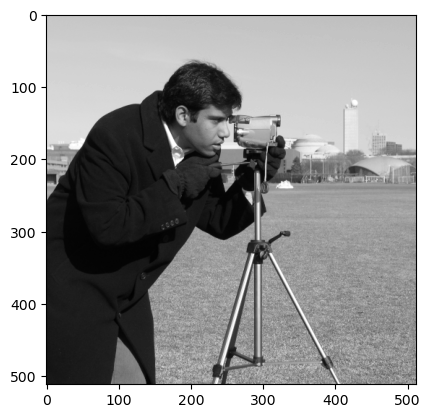

In [70]:
# load images and visualize it
image = data.camera()
plt.imshow(image, cmap=plt.cm.gray)

To help visualisation later, we will create a function to display two images in a row.

In [71]:
def display2imgs(img1, img2):
    _, axes = plt.subplots(ncols=2)
    axes[0].imshow(img1, cmap=plt.cm.gray)
    axes[0].set_title('Original')
    axes[1].imshow(img2, cmap=plt.cm.gray)
    axes[1].set_title('Result')

Now we can implement the conv2d function that will take the same arguments as conv1d but will work on two dimensions.

In [72]:
def conv2d(signal, kernel, padding=(0,0), stride=(1,1)):
    result = []
    # get sizes
    signal_x, signal_y = signal.shape
    kernel_len_x, kernel_len_y = kernel.shape
    padding_x, padding_y = padding
    stride_x, stride_y = stride

    # apply padding to the 2d signal
    #############################################################
    # your code here

    # Compute the size of the padded image
    padded_x = padding_x + signal_x + padding_x
    padded_y = padding_y + signal_y + padding_y
    # Now create the new padded image
    padded_signal = np.zeros([padded_x, padded_y])
    padded_signal[padding_x:signal_x+padding_x,padding_y:signal_y+padding_y] = signal

    kernel_side_x = kernel_len_x // 2
    kernel_side_y = kernel_len_y // 2 
    # For slightly better performances, I'm putting this here, so it doesn't recompute those every time
    #############################################################
    
    # iterating over rows
    for i in range(10, padded_x - kernel_len_x + 1, stride_x):
        # create empty row for the result of the convolution of the current row
        result.append([])
        # iterating over columns
        for j in range(50, padded_y - kernel_len_y + 1, stride_y):
            # compute the convolution and add the it to the result row list
            # For the 2d convolution you need to convolut part of the signal with the kernel
            # Hint:
            #   - x = np.arange(4.0).reshape((2, 2))
            # [[0. 1.]
            # [2. 3.]]
            #   - y = np.arange(4.0).reshape((2, 2))
            # [[0. 1.]
            # [2. 3.]]
            #   - (x * y).sum() = 14,0

            #############################################################
            # your code here
            """
            The process is once again fairly similar : 
            1. For a given point i,j, I define a window, which are all the other pixels that are around the point, ¨
                if I were to center the kernel on the point.  
                1.1 For this window, I can get it via slicing an upper bound  and a lower bound, defined as two other point in the matrix.
                    It's close to how I embebbed the signal into the padded matrix.
            2. I can then take the element wise product of the window * kernel, and sum them up together. 
                This sum is the value of the convolution. 
            """
        
            # Calculate start and end indices for the window
            start_x = max(0, i - kernel_side_x)
            end_x = min(padded_signal.shape[0], i + kernel_side_x + 1)
            start_y = max(0, j - kernel_side_y)
            end_y = min(padded_signal.shape[1], j + kernel_side_y + 1)


            window = padded_signal[start_x:end_x, start_y:end_y]
            conv = np.sum(window * kernel)
            #############################################################
            result[-1].append(conv)

    return np.array(result)

Now test your code and visualize the result of the convolution.

Original image size: (512, 512)
Convoluted image size: (502, 462)


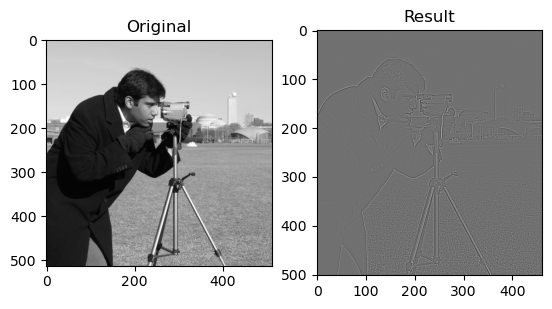

In [73]:
# load the image
image = data.camera()

# define the kernel
kernel = np.array(
    [[-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]])

# do the convolution
result = conv2d(image, kernel, padding=(1,1))

# show the time series
display2imgs(image, result)
print(f"Original image size: {image.shape}")
print(f"Convoluted image size: {result.shape}")

(512, 512)
Original image size: (512, 512)
Convoluted image size: (498, 458)


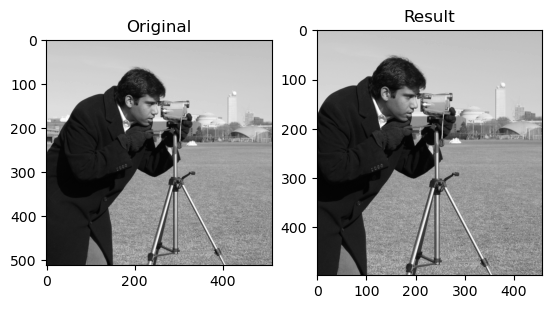

In [74]:
# load the image
image = data.camera()
print(image.shape)

# define the kernel
kernel = np.array(
    [[0,0,0,0,0], 
    [0,0,-1,0,0], 
    [0,-1,50,-1,0], 
    [0,0,-1,0,0], 
    [0,0,0,0,0]])

# do the convolution
result = conv2d(image, kernel, padding=(0,0))

# show the time series
display2imgs(image, result)
print(f"Original image size: {image.shape}")
print(f"Convoluted image size: {result.shape}")

Original image size: (512, 512)
Convoluted image size: (502, 462)


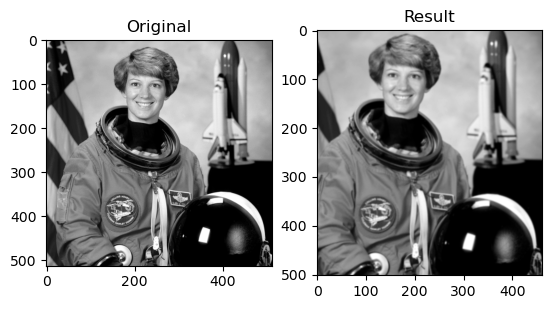

In [75]:
# load the image
image = data.astronaut()
image = color.rgb2gray(image)

# define the kernel
kernel = np.array(
    [[1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1],])
kernel = 1/256 * kernel

# do the convolution
result = conv2d(image, kernel, padding=(2,2))

# show the time series
display2imgs(image, result)
print(f"Original image size: {image.shape}")
print(f"Convoluted image size: {result.shape}")

**Question**

Explain what the convolution captures from each of the examples above. Describe the kernel used and what it is useful for, etc.

*Answer this question in your report*

## Matrix Rotation

Now, we will implement a rotation function that will take a dataset and a rotation matrix and will rotate the dataset according to the rotation matrix.


First, we will create a dataset that we will use later, and create a function that will help us visualize.

(2, 100)


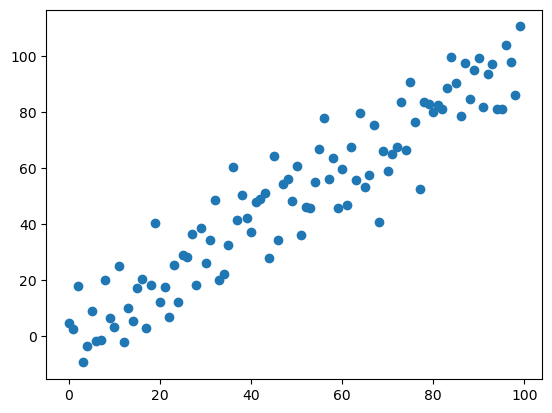

In [76]:
np.random.seed(131)

def create_dataset(n, a=1., b=0., sigma=10.):
    x = np.arange(n).reshape(n)
    y = a * x + b

    noise = np.random.normal(0, sigma, size=(n))
    y += noise
    return np.array([x,y])

dataset = create_dataset(100)
print(dataset.shape)
# show the dataset
plt.scatter(dataset[0], dataset[1])


In [77]:
def display2datasets(dataset1, dataset2):
    plt.ion()
    _, axes = plt.subplots(ncols=2)
    axes[0].scatter(dataset1[0], dataset1[1])
    axes[0].set_title('Original')
    axes[1].scatter(dataset2[0], dataset2[1])
    axes[1].set_title('Rotation')

It is time for you to code! Implement the missing parts below.

In [78]:
def get_rotation_matrix(angle):
    rotation_matrix = np.zeros((2,2))
    #############################################################
    # your code here
    
    # angle should be in radians so cast it to radians
    angle = angle * (np.pi/180)
    # I got this v matrix from wikipedia, 
    # but I got the "proof" and follow up intuition from a video I linked in the rapport.
    # For once, no ChatGPT were used at all !  
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
        ])
    #############################################################
    return rotation_matrix

Now that you have implemented the get_rotation_matrix, we can apply this matrix to the dataset and observe the result.

In [79]:
def apply_rotation(dataset, angle):
    rotation_matrix = get_rotation_matrix(angle)
    rotated_dataset = np.zeros(dataset.shape)

    #############################################################
    # your code here

    rotated_dataset = np.dot(rotation_matrix, dataset)
    #############################################################
    return rotated_dataset

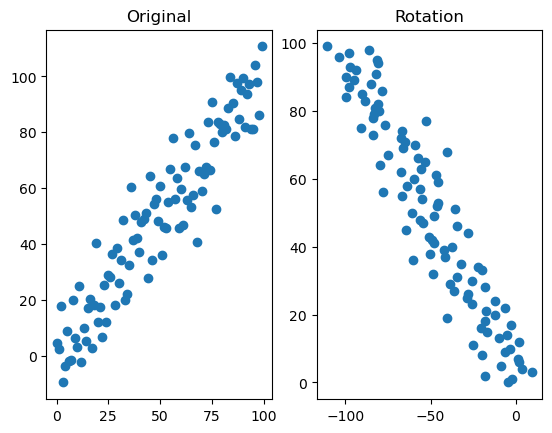

In [80]:
np.random.seed(131)
dataset = create_dataset(100)
rotated_dataset = apply_rotation(dataset, 90)
display2datasets(dataset, rotated_dataset)

**Question**

Explain what you see in the above figure, what does the rotation matrix do to the dataset? Does the distance change between the points in the dataset after a rotation ? If the distance between the points changes, give the formula to compute the new distance.

*Answer this question in your report*

You can now play with the following animation, and see what happens to the dataset when you rotate it from 0 to 360 degrees

In [81]:
np.random.seed(131)
dataset = create_dataset(100)

import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
plt.ioff()
fig, ax = plt.subplots()

def animate(t):
    angle = t*10
    plt.cla()
    dataset_rotated = apply_rotation(dataset, angle)
    plt.scatter(dataset_rotated[0], dataset_rotated[1])
    plt.title(f"Angle: {angle}°")
    plt.xlim(-150,150)
    plt.ylim(-150,150)

matplotlib.animation.FuncAnimation(fig, animate, frames=37)